# Import Packages and Initialization

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import cv2
from PIL import Image
import timeit

In [5]:
import torch
from torchvision import datasets, transforms

/usr/local/lib/python3.10/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/local/lib/python3.10/dist-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [6]:
# Label mapping for Y
# img_label_mapping = {0: 'buildings', 1: 'forest', 2: 'glacier', 3: 'mountain', 4: 'sea', 5: 'street'}
# classes = len (img_label_mapping)
# classes

In [7]:
def is_colab():
  try:
    import google.colab
    return True
  except ImportError:
    return False

# Example usage:
is_colab = is_colab()
is_colab

False

# Load data

## Load from file

In [8]:
img_size = 224

In [9]:
if is_colab == True:
  from google.colab import drive
  drive.mount('/content/drive')

In [10]:
if is_colab == True:
  path = '/content/drive/MyDrive/GeorgiaTech/08_DL_CS7643/Project/Data/intel_image'
  sys.path.append (path)
  data_path = path + '/raw_data/'
else:
#   data_path = 'data/intel_image/raw_data/'
  data_path = 'data/'  #on PACE

In [11]:
# def get_data (type='training'):
#     _df_X = pd.read_parquet(data_path + type + '_X.parquet')
#     _df_X['X'] = _df_X['X_flat'].apply(lambda x: x.reshape(100, 100, 3))
#     if type != 'pred':
#         _df_Y = pd.read_parquet(data_path + type + '_Y.parquet')
#         return pd.DataFrame({'X': _df_X['X'], 'Y': _df_Y['Y']})
#     else:
#         return pd.DataFrame({'X': _df_X['X']})

In [12]:
# df_train = get_data('training')
# df_test  = get_data('testing')
# df_pred  = get_data('pred')
# print (df_train.info())
# print ('\n')
# print (df_test.info())
# print ('\n')
# print (df_pred.info())

In [13]:
# transform = transforms.Compose([transforms.Resize((img_size,img_size)),
#                                 transforms.ToTensor()])

# Image preprocessing
resize_transform = transforms.Resize((256, 256))
crop_transform = transforms.CenterCrop(img_size)
to_tensor_transform = transforms.ToTensor()
normalize_transform = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

transform = transforms.Compose([resize_transform,
                                crop_transform,
                                to_tensor_transform,
                                normalize_transform])

In [14]:
train_data = datasets.ImageFolder(data_path + 'seg_train', transform=transform)
test_data = datasets.ImageFolder(data_path + 'seg_test', transform=transform)

In [15]:
batch_size = 32

In [16]:
# use the ImageFolder dataset to create the DataLoader
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [17]:
print (type (train_data))
print (f'Length of Train data & Test data = {len (train_data)} & {len (test_data)}' )
print (f'Image shape = {train_data[0][0].shape}') # 3, 224, 224 (RGB, 224x224)
print (f'Number of classes = {len (train_data.classes)}')
print (f'Classes = {train_data.classes}')
print (f'Class to index mapping = {train_data.class_to_idx}')
for i in range (len (train_data.classes)):
    print (f'Number of images per class {i} = {train_data.targets.count(i)}')

print (f'Label of first image = {train_data[0][1]} ;  Class = {train_data.classes[train_data[0][1]]}')

<class 'torchvision.datasets.folder.ImageFolder'>
Length of Train data & Test data = 14034 & 3000
Image shape = torch.Size([3, 224, 224])
Number of classes = 6
Classes = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
Class to index mapping = {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
Number of images per class 0 = 2191
Number of images per class 1 = 2271
Number of images per class 2 = 2404
Number of images per class 3 = 2512
Number of images per class 4 = 2274
Number of images per class 5 = 2382
Label of first image = 0 ;  Class = buildings


In [18]:
classes = train_data.classes
classes

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [19]:
# type (train_data.class_to_idx)
train_data.class_to_idx.items()

dict_items([('buildings', 0), ('forest', 1), ('glacier', 2), ('mountain', 3), ('sea', 4), ('street', 5)])

In [20]:
# train_data[0][0].shape[1:3] == (224,224)
# train_data[0][0].shape  == (3,224,224)
train_data[0][0].shape

torch.Size([3, 224, 224])

In [21]:
# # Are all train_data in shape 3,224,224?
# for i in range (len (train_data)):
#     if train_data[i][0].shape  != (3,224,224):
#       print (f"Image {i} has shape {train_data[i][0].shape}")

In [22]:
print (train_data[0][1])    #the data label
print (len (train_data[0])) #len = 2 -> [0] is image, [1] is label

0
2


In [23]:
print (type (train_loader))
print (len (train_loader))

<class 'torch.utils.data.dataloader.DataLoader'>
439


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


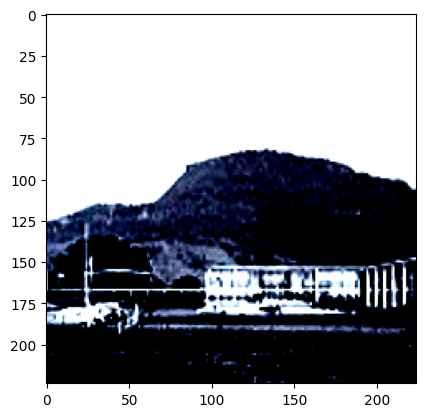

In [24]:
plt.imshow (train_data[0][0].permute(1, 2, 0))  # permute to change the order of the dimensions from (C, W, H) to (W, H, C)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


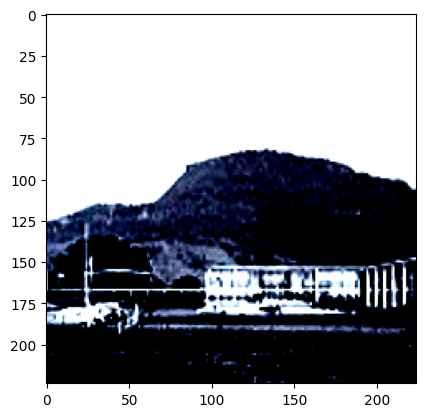

In [25]:
plt.imshow (train_data[0][0].permute(1, 2, 0))  # permute to change the order of the dimensions from (C, W, H) to (W, H, C)

## Test the image load

In [26]:
# Run this to test your data loader
images, labels = next(iter(train_loader))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


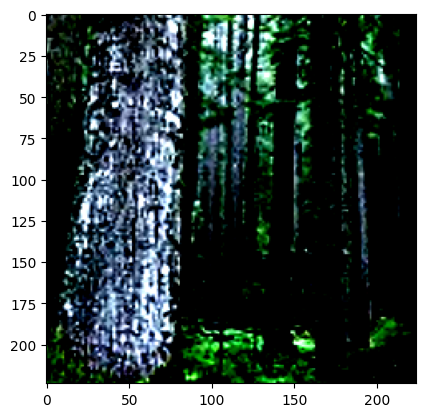

In [27]:
plt.imshow (images[0].permute(1, 2, 0))  # permute to change the order of the dimensions from (C, W, H) to (W, H, C)

In [28]:
print (labels[0])
print (labels[0].item())

tensor(1)
1


In [29]:
def print_images (df_images, df_labels, n=15, nrow=3, title='Intel Images'):
    ncol = int (n/nrow)
    if nrow==5:
      figsize = (20,20)
    else:
      figsize = (15,15)
    fig, ax = plt.subplots (nrows=nrow, ncols=ncol, figsize=figsize)
    fig.suptitle(title)
    for i in range(n):
        # idx = np.random.randint(0, len(df_image))

        _row = i//ncol
        _col = i%ncol
        ax[_row,_col].imshow(df_images[i].permute(1, 2, 0))
        # ax[_row,_col].set_title(img_label_mapping[df_labels[i].item()] )
        ax[_row,_col].set_title(train_data.classes[df_labels[i].item()])
        ax[_row,_col].axis('off')

In [30]:
# _images = 16
# print_images (train_data [0:_images,0], train_data [0:_images,1],_images,4)  #16 images in 4 row


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

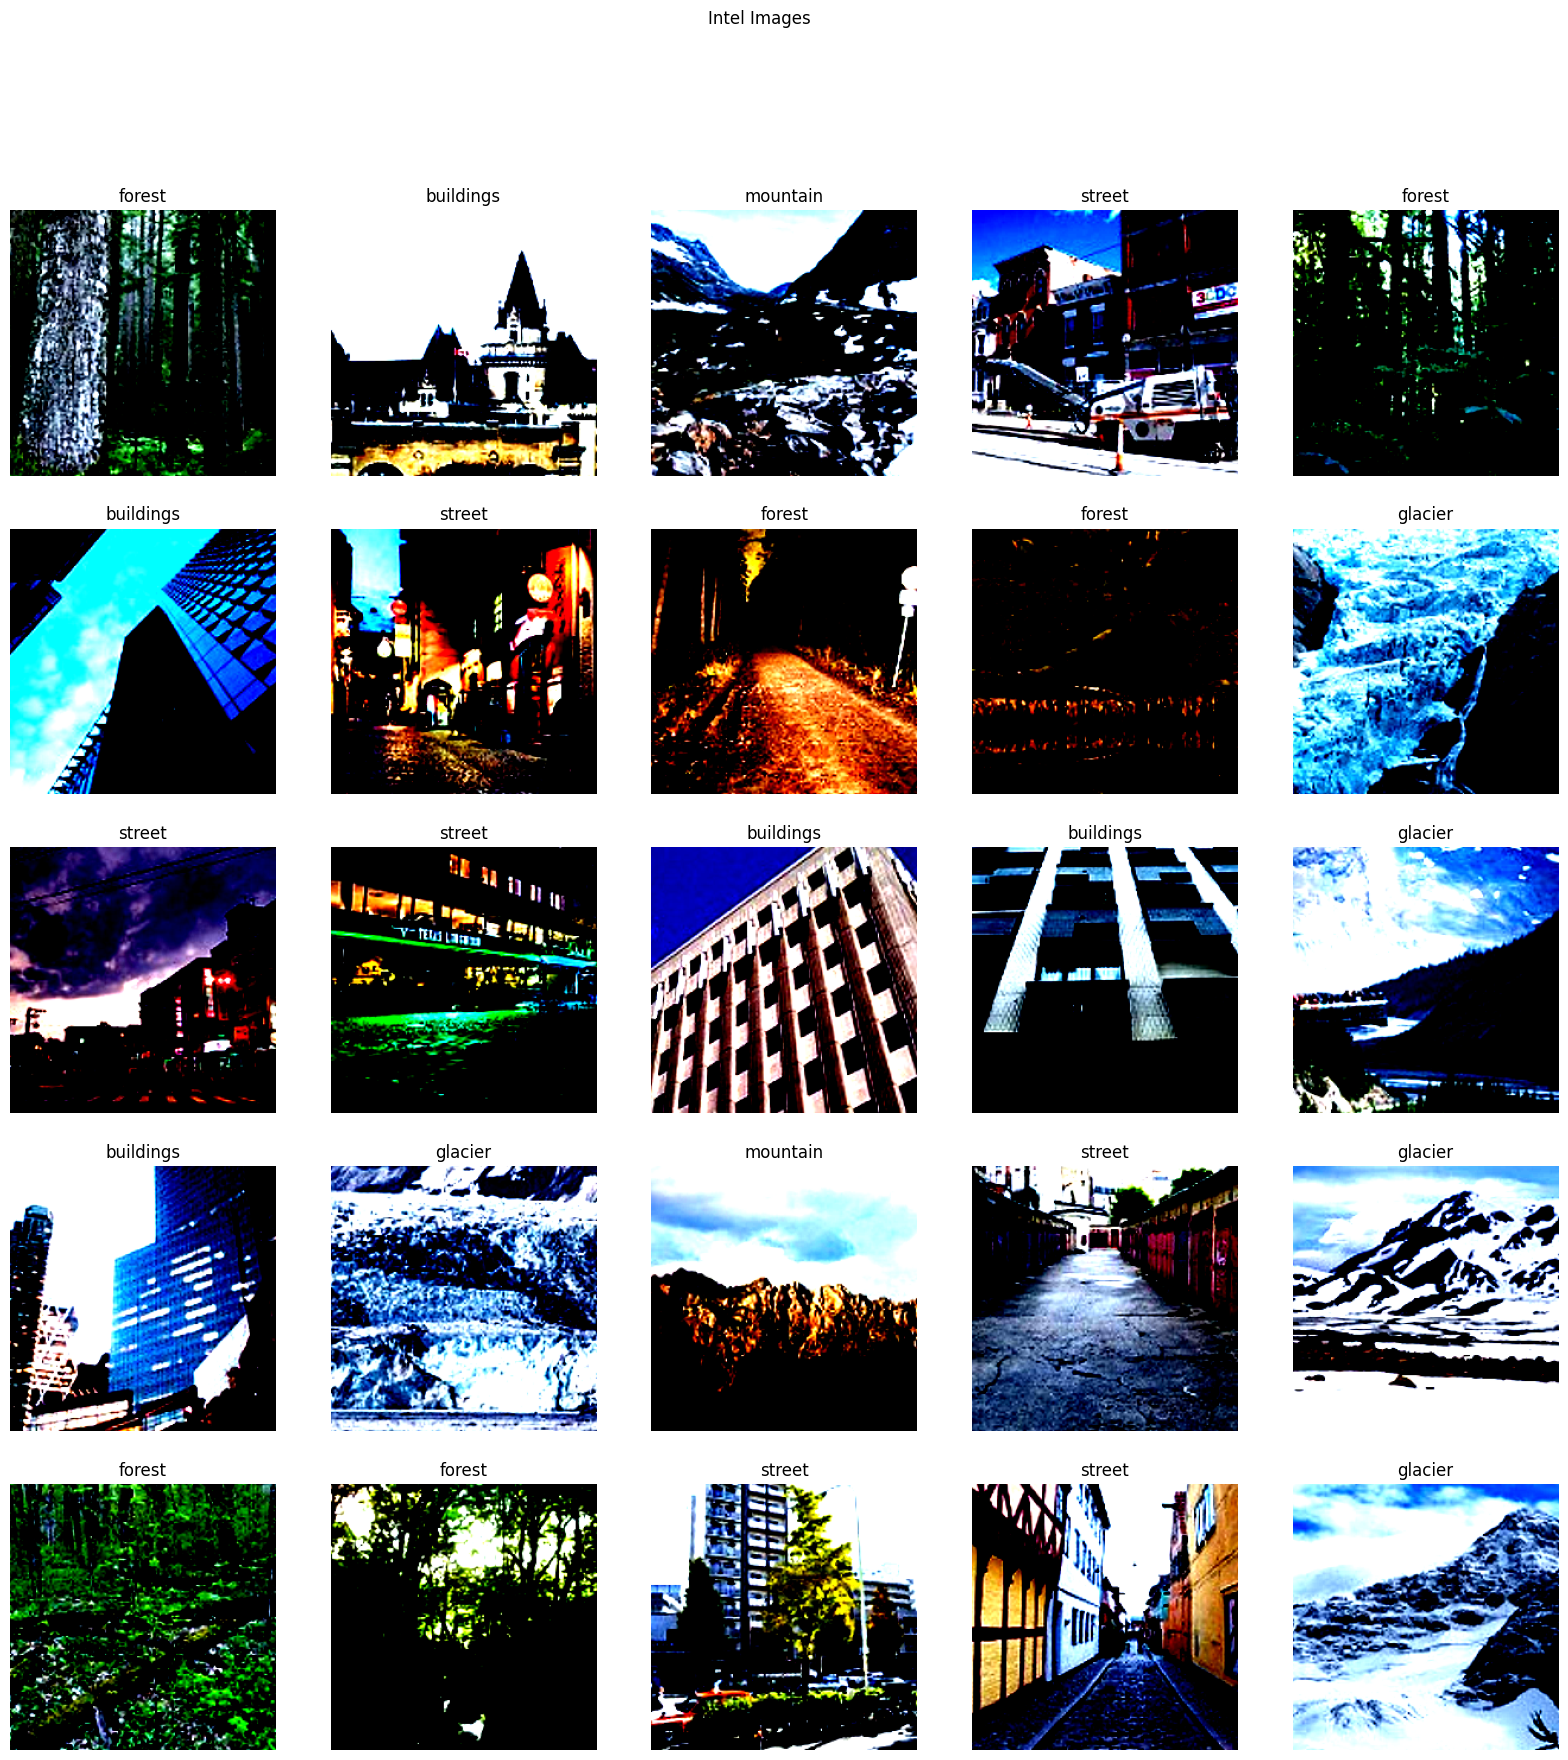

In [31]:
# print_images (images, labels,16,4)  #16 images in 4 row
print_images (images, labels,25,5)  #25 images in 5 row

# Vision Transformer VTi model

inspired by :
https://colab.research.google.com/drive/1eQS3NZ8gPhTGd98o88rKZ0nYZJMg7Ujq#scrollTo=b6676a19

Reference: https://pytorch.org/vision/stable/models/vision_transformer.html

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [33]:
from torch.utils.data         import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

In [34]:
import torchvision
import torchvision.transforms as T
import torchvision.models as models
import torchvision.transforms as T
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler

In [35]:
batch_size = 32

## Define data loaders

In [36]:
# percentage of training set to use as validation
valid_size = 0.25

# get training indices that wil be used for validation
train_size = len(train_data)
indices = list(range(train_size))
np.random.shuffle(indices)
split = int(np.floor(valid_size * train_size))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers to obtain training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders
train_loader = DataLoader(train_data, batch_size=batch_size, sampler=train_sampler)
valid_loader = DataLoader(train_data, batch_size=batch_size, sampler=valid_sampler)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [37]:
print (f"Original train data = {train_size}, \nAfter split 75:25 : {train_size-split} & {split}")

Original train data = 14034, 
After split 75:25 : 10526 & 3508


In [38]:
# # print out classes statistics

# # get all training samples labels
# train_labels = [labels for i, (images, labels) in enumerate(train_loader)]
# train_labels = torch.cat((train_labels), 0)
# train_labels_count = train_labels.unique(return_counts=True)

# # print(train_labels_count)

# print('The number of samples per classes in training dataset:\n')
# for label, count in zip(train_labels_count[0], train_labels_count[1]):
#     print('\t {}: {}'.format(label, count))

# # get all test samples labels
# test_labels = [labels for i, (images, labels) in enumerate(test_loader)]
# test_labels = torch.cat((test_labels), 0)
# test_labels_count = test_labels.unique(return_counts=True)

# print()
# print('The number of samples per classes in test dataset:\n')
# for label, count in zip(test_labels_count[0], test_labels_count[1]):
#     print('\t {}: {}'.format(label, count))

## Define Common Functions

In [63]:
def ViT_init (vision_transformer, learning_rate, weight_decay, model= 'vit_b'):
    # fine-tune with dataset

    # change the number of output classes
    if model == 'vit_b':   #vision transformer base model
        vision_transformer.heads = nn.Linear(in_features=768, out_features=len (classes), bias=True)
    elif model == 'vit_l': #vision transformer large model
        vision_transformer.heads = nn.Linear(in_features=1024, out_features=len (classes), bias=True)

    # freeze the parameters except the last linear layer
    #
    # freeze weights
    for p in vision_transformer.parameters():
        p.requires_grad = False

    # unfreeze weights of classification head to train
    for p in vision_transformer.heads.parameters():
        p.requires_grad = True
        
    # specify loss function
    criterion = nn.CrossEntropyLoss()

    # define optimizer
    # only train the parameters with requires_grad set to True
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, vision_transformer.parameters()), 
                           lr=learning_rate, weight_decay=weight_decay)
    
    return (criterion, optimizer)

In [40]:
def ViT_training (vision_transformer, criterion, optimizer, n_epoch):
    
    # Check for a GPU
    train_on_gpu = torch.cuda.is_available()
    train_on_gpu
    
    
    # Train model
    train_loss_list, valid_loss_list = [], []

    # move model to GPU
    if train_on_gpu:
        vision_transformer.to('cuda')

    # prepare model for training
    vision_transformer.train()
    
    print ('Start Training')

    starttime = timeit.default_timer()    

    for e in range(n_epoch):
        train_loss = 0.0
        valid_loss = 0.0

        # get batch data
        for i, (images, targets) in enumerate(train_loader):
            if i % 50 == 0:
                print (f'Batch {i+1} of {len(train_loader)}')

            # move to gpu if available
            if train_on_gpu:
                images, targets = images.to('cuda'), targets.to('cuda')

            # clear grad
            optimizer.zero_grad()

            # feedforward data
            outputs = vision_transformer(images)

            # calculate loss
            loss = criterion(outputs, targets)

            # backward pass, calculate gradients
            loss.backward()

            # update weights
            optimizer.step()

            # track loss
            train_loss += loss.item()

        # set model to evaluation mode
        vision_transformer.eval()

        print ('Validating model')

        # validate model
        for images, targets in valid_loader:

            # move to gpu if available
            if train_on_gpu:
                images = images.to('cuda')
                targets = targets.to('cuda')

            # turn off gradients
            with torch.no_grad():

                outputs = vision_transformer(images)
                loss = criterion(outputs, targets)
                valid_loss += loss.item()

        # set model back to training mode
        vision_transformer.train()

        # get average loss values
        train_loss = train_loss / len(train_loader)
        valid_loss = valid_loss / len(valid_loader)

        train_loss_list.append(train_loss)
        valid_loss_list.append(valid_loss)

        # output training statistics for epoch
        print('Epoch: {} \t Training Loss: {:.6f} \t Validation Loss: {:.6f}'
                      .format( (e+1), train_loss, valid_loss))


    print ('\n')
    print(f"Time Taken for training of {len (train_data)} train_data = {starttime} - {timeit.default_timer()} = {timeit.default_timer() - starttime} seconds ")
    print(f" in minutes : { (timeit.default_timer() - starttime)/60} minutes ")    
    
    return (train_loss_list, valid_loss_list)

    

In [41]:
def visualize_loss_statistics (n_epoch, train_loss_list, valid_loss_list):
# visualize loss statistics

    plt.title("Training and Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")

    # plot losses
    x = list(range(1, n_epoch + 1))
    plt.plot(x, train_loss_list, color ="blue", label='Train')
    plt.plot(x, valid_loss_list, color="orange", label='Validation')
    plt.legend(loc="upper right")
    plt.xticks(x)

    plt.show()

In [42]:
def ViT_testing (vision_transformer):
    starttime = timeit.default_timer()

    # prepare model for evaluation
    vision_transformer.eval()

    test_loss = 0.0
    accuracy = 0

    # number of classes
    n_class = len(classes)

    class_correct = np.zeros(n_class)
    class_total = np.zeros(n_class)
    
    # Check for a GPU
    train_on_gpu = torch.cuda.is_available()
    train_on_gpu    

    # # move model back to cpu
    # vision_transformer = vision_transformer.to('cpu')

    if train_on_gpu:
        vision_transformer.to('cuda')
    else:
        vision_transformer = vision_transformer.to('cpu')



    # test model
    for images, targets in test_loader:

        # move to gpu if available
        if train_on_gpu:
            images, targets = images.to('cuda'), targets.to('cuda')


        # get outputs
        outputs = vision_transformer(images)

        # calculate loss
        loss = criterion(outputs, targets)

        # track loss
        test_loss += loss.item()

        # get predictions from probabilities
        preds = torch.argmax(F.softmax(outputs, dim=1), dim=1)

        # get correct predictions
        if train_on_gpu:
            correct_preds = (preds == targets).type(torch.cuda.FloatTensor)    
        else:
            correct_preds = (preds == targets).type(torch.FloatTensor)
    #     if train_on_gpu:
    #         correct_preds.to('cuda')

        # calculate and accumulate accuracy
        accuracy += torch.mean(correct_preds).item() * 100

        # calculate test accuracy for each class
        for c in range(n_class):

    #         targets = targets.to('cpu')
            if train_on_gpu:
                targets = targets.to('cuda')
            else:
                targets = targets.to('cpu')


            class_total[c] += (targets == c).sum()
            class_correct[c] += ((correct_preds) * (targets == c)).sum()

    # get average accuracy
    accuracy = accuracy / len(test_loader)

    # get average loss
    test_loss = test_loss / len(test_loader)

    # output test loss statistics
    print('Test Loss: {:.6f}'.format(test_loss))
    print('Accuracy : {:.6f}'.format(accuracy))

    print ('\n')
    print(f"Time Taken for inference of {len (test_data)} rows = {starttime} - {timeit.default_timer()} = {timeit.default_timer() - starttime} seconds ")
    
    return (class_correct,class_total,accuracy)



In [43]:
def display_accuracy_per_class (class_correct, classtotal,accuracy):
    class_accuracy = class_correct / class_total

    print('Test Accuracy of Classes')
    
    # number of classes
    n_class = len(classes)    

    for c in range(n_class):
        print('{}\t: {}% \t ({}/{})'.format(classes[c],
                                    int(class_accuracy[c] * 100), int(class_correct[c]), int(class_total[c])) )



    print()
    print('Test Accuracy of Dataset: \t {}% \t ({}/{})'.format(int(accuracy),
                                                               int(np.sum(class_correct)), int(np.sum(class_total)) ))

## Transformer model with pretrained weight

### ViT Base model B16 - with pretrained weight
ViT B16 is the base model: 12 layers, 768 Hidden Size, 3072 MLP size, 12 Heads, 86M parameters, 
and each patch size is 16x16 pixels

In [30]:
# hyper parameter
learning_rate = 0.0001
drop_out_rate = 0.1
weight_decay  = 1e-2

# number of epoch
n_epoch = 10

In [31]:
# define model
vit_b16_with_pretrained_weights = models.vit_b_16(weights=models.ViT_B_16_Weights.DEFAULT, dropout=drop_out_rate)

In [32]:
# vit-16 model is trained on ImageNet
# we expect to have output of 1000 number of classes
vit_b16_with_pretrained_weights.heads

Sequential(
  (head): Linear(in_features=768, out_features=1000, bias=True)
)

In [33]:
criterion, optimizer = ViT_init (vit_b16_with_pretrained_weights,learning_rate, weight_decay)

In [34]:
# check whether corresponding layers are frozen
for layer_name, p in vit_b16_with_pretrained_weights.named_parameters():
    print('Layer Name: {}, Frozen: {}'.format(layer_name, not p.requires_grad))
    print()

Layer Name: class_token, Frozen: True

Layer Name: conv_proj.weight, Frozen: True

Layer Name: conv_proj.bias, Frozen: True

Layer Name: encoder.pos_embedding, Frozen: True

Layer Name: encoder.layers.encoder_layer_0.ln_1.weight, Frozen: True

Layer Name: encoder.layers.encoder_layer_0.ln_1.bias, Frozen: True

Layer Name: encoder.layers.encoder_layer_0.self_attention.in_proj_weight, Frozen: True

Layer Name: encoder.layers.encoder_layer_0.self_attention.in_proj_bias, Frozen: True

Layer Name: encoder.layers.encoder_layer_0.self_attention.out_proj.weight, Frozen: True

Layer Name: encoder.layers.encoder_layer_0.self_attention.out_proj.bias, Frozen: True

Layer Name: encoder.layers.encoder_layer_0.ln_2.weight, Frozen: True

Layer Name: encoder.layers.encoder_layer_0.ln_2.bias, Frozen: True

Layer Name: encoder.layers.encoder_layer_0.mlp.0.weight, Frozen: True

Layer Name: encoder.layers.encoder_layer_0.mlp.0.bias, Frozen: True

Layer Name: encoder.layers.encoder_layer_0.mlp.3.weight, Fro

In [35]:
train_loss_list, valid_loss_list = ViT_training (vit_b16_with_pretrained_weights, criterion, optimizer, n_epoch)

Batch 1 of 329
Batch 51 of 329
Batch 101 of 329
Batch 151 of 329
Batch 201 of 329
Batch 251 of 329
Batch 301 of 329
Validating model
Epoch: 1 	 Training Loss: 1.011286 	 Validation Loss: 0.514170
Batch 1 of 329
Batch 51 of 329
Batch 101 of 329
Batch 151 of 329
Batch 201 of 329
Batch 251 of 329
Batch 301 of 329
Validating model
Epoch: 2 	 Training Loss: 0.542885 	 Validation Loss: 0.369658
Batch 1 of 329
Batch 51 of 329
Batch 101 of 329
Batch 151 of 329
Batch 201 of 329
Batch 251 of 329
Batch 301 of 329
Validating model
Epoch: 3 	 Training Loss: 0.447010 	 Validation Loss: 0.319949
Batch 1 of 329
Batch 51 of 329
Batch 101 of 329
Batch 151 of 329
Batch 201 of 329
Batch 251 of 329
Batch 301 of 329
Validating model
Epoch: 4 	 Training Loss: 0.398128 	 Validation Loss: 0.293932
Batch 1 of 329
Batch 51 of 329
Batch 101 of 329
Batch 151 of 329
Batch 201 of 329
Batch 251 of 329
Batch 301 of 329
Validating model
Epoch: 5 	 Training Loss: 0.373395 	 Validation Loss: 0.276733
Batch 1 of 329
Batch

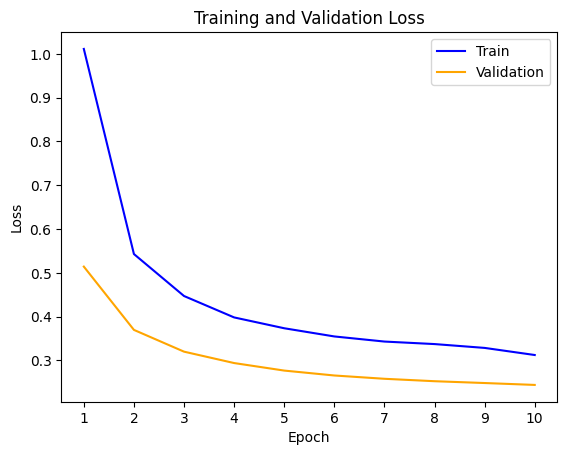

In [36]:
visualize_loss_statistics (n_epoch, train_loss_list, valid_loss_list)

In [37]:
# Save the model
# torch.save(vit_b_16_with_pretrained_weights.state_dict(),'vit_b16_with_pretrained_weights.pt')
# https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [39]:
class_correct,class_total,accuracy = ViT_testing (vit_b16_with_pretrained_weights)

Test Loss: 0.240757
Accuracy : 91.633422


Time Taken for inference of 3000 rows = 5194016.64035126 - 5194067.95216208 = 51.31181249767542 seconds 


In [42]:
display_accuracy_per_class (class_correct, class_total, accuracy)

Test Accuracy of Classes
buildings	: 91% 	 (399/437)
forest	: 99% 	 (470/474)
glacier	: 80% 	 (444/553)
mountain	: 88% 	 (464/525)
sea	: 98% 	 (502/510)
street	: 93% 	 (470/501)

Test Accuracy of Dataset: 	 91% 	 (2749/3000)


### ViT Base Model B32 - with pretrained weights
ViT B32 is the Base model with each patch size 32x32

In [43]:
# hyper parameter
learning_rate = 0.0001
drop_out_rate = 0.1
weight_decay  = 1e-2

# number of epoch
n_epoch = 10

In [44]:
# define model
vitb32_with_pretrained_weights = models.vit_b_32(weights=models.ViT_B_32_Weights.DEFAULT, dropout=drop_out_rate)

In [48]:
criterion, optimizer = ViT_init (vitb32_with_pretrained_weights, learning_rate, weight_decay)

In [49]:
train_loss_list, valid_loss_list = ViT_training (vitb32_with_pretrained_weights, criterion, optimizer, n_epoch)

Batch 1 of 329
Batch 51 of 329
Batch 101 of 329
Batch 151 of 329
Batch 201 of 329
Batch 251 of 329
Batch 301 of 329
Validating model
Epoch: 1 	 Training Loss: 1.143685 	 Validation Loss: 0.681132
Batch 1 of 329
Batch 51 of 329
Batch 101 of 329
Batch 151 of 329
Batch 201 of 329
Batch 251 of 329
Batch 301 of 329
Validating model
Epoch: 2 	 Training Loss: 0.654248 	 Validation Loss: 0.503780
Batch 1 of 329
Batch 51 of 329
Batch 101 of 329
Batch 151 of 329
Batch 201 of 329
Batch 251 of 329
Batch 301 of 329
Validating model
Epoch: 3 	 Training Loss: 0.522574 	 Validation Loss: 0.440019
Batch 1 of 329
Batch 51 of 329
Batch 101 of 329
Batch 151 of 329
Batch 201 of 329
Batch 251 of 329
Batch 301 of 329
Validating model
Epoch: 4 	 Training Loss: 0.469284 	 Validation Loss: 0.396489
Batch 1 of 329
Batch 51 of 329
Batch 101 of 329
Batch 151 of 329
Batch 201 of 329
Batch 251 of 329
Batch 301 of 329
Validating model
Epoch: 5 	 Training Loss: 0.435507 	 Validation Loss: 0.375171
Batch 1 of 329
Batch

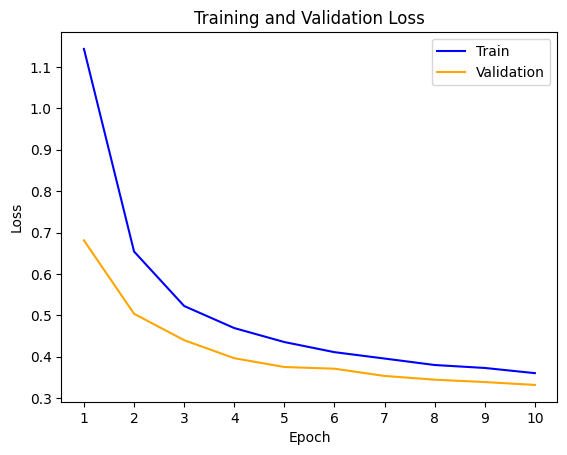

In [51]:
visualize_loss_statistics (n_epoch, train_loss_list, valid_loss_list)

In [53]:
# Save the model
torch.save(vitb32_with_pretrained_weights.state_dict(),'vitb32_with_pretrained_weights.pt')
# https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [54]:
class_correct,class_total,accuracy = ViT_testing (vitb32_with_pretrained_weights)

Test Loss: 0.340606
Accuracy : 85.361259


Time Taken for inference of 3000 rows = 5195313.86502319 - 5195325.568907794 = 11.70388630591333 seconds 


In [55]:
display_accuracy_per_class (class_correct, class_total, accuracy)

Test Accuracy of Classes
buildings	: 88% 	 (386/437)
forest	: 98% 	 (468/474)
glacier	: 42% 	 (233/553)
mountain	: 96% 	 (505/525)
sea	: 97% 	 (496/510)
street	: 94% 	 (472/501)

Test Accuracy of Dataset: 	 85% 	 (2560/3000)


### ViT Large Model L16 with pretrained weights
ViT L16 is the Large model with 24 layers, 1024 Hidden size, 4096 MLP size, 16 Heads, and each patch size is 16x16

In [44]:
# hyper parameter
learning_rate = 0.001
drop_out_rate = 0.1
weight_decay  = 1e-2

# number of epoch
n_epoch = 10

In [48]:
# define model
vitl16_with_pretrained_weights = models.vit_l_16(weights=models.ViT_L_16_Weights.DEFAULT,dropout=drop_out_rate)

In [49]:
# vit-16 model is trained on ImageNet
# we expect to have output of 1000 number of classes
vitl16_with_pretrained_weights.heads

Sequential(
  (head): Linear(in_features=1024, out_features=1000, bias=True)
)

In [53]:
criterion, optimizer = ViT_init (vitl16_with_pretrained_weights, learning_rate, weight_decay, model = 'vit-l')

In [54]:
train_loss_list, valid_loss_list = ViT_training (vitl16_with_pretrained_weights, criterion, optimizer, n_epoch)

Start Training
Batch 1 of 329
Batch 51 of 329
Batch 101 of 329
Batch 151 of 329
Batch 201 of 329
Batch 251 of 329
Batch 301 of 329
Validating model
Epoch: 1 	 Training Loss: 0.860020 	 Validation Loss: 0.332686
Batch 1 of 329
Batch 51 of 329
Batch 101 of 329
Batch 151 of 329
Batch 201 of 329
Batch 251 of 329
Batch 301 of 329
Validating model
Epoch: 2 	 Training Loss: 0.293463 	 Validation Loss: 0.276783
Batch 1 of 329
Batch 51 of 329
Batch 101 of 329
Batch 151 of 329
Batch 201 of 329
Batch 251 of 329
Batch 301 of 329
Validating model
Epoch: 3 	 Training Loss: 0.251951 	 Validation Loss: 0.251349
Batch 1 of 329
Batch 51 of 329
Batch 101 of 329
Batch 151 of 329
Batch 201 of 329
Batch 251 of 329
Batch 301 of 329
Validating model
Epoch: 4 	 Training Loss: 0.228996 	 Validation Loss: 0.246759
Batch 1 of 329
Batch 51 of 329
Batch 101 of 329
Batch 151 of 329
Batch 201 of 329
Batch 251 of 329
Batch 301 of 329
Validating model
Epoch: 5 	 Training Loss: 0.223194 	 Validation Loss: 0.241877
Batch

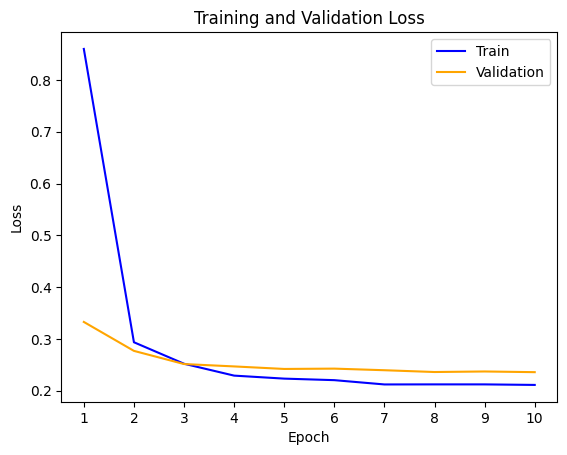

In [55]:
visualize_loss_statistics (n_epoch, train_loss_list, valid_loss_list)

In [57]:
# Save the model
torch.save(vitl16_with_pretrained_weights.state_dict(),'vit-l-16_with_pretrained_weights.pt')
# https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [58]:
class_correct,class_total,accuracy = ViT_testing (vitl16_with_pretrained_weights)

Test Loss: 0.244399
Accuracy : 92.996454


Time Taken for inference of 3000 rows = 5218086.008777314 - 5218164.651729581 = 78.64295390341431 seconds 


In [59]:
display_accuracy_per_class (class_correct, class_total, accuracy)

Test Accuracy of Classes
buildings	: 95% 	 (416/437)
forest	: 99% 	 (470/474)
glacier	: 84% 	 (468/553)
mountain	: 90% 	 (475/525)
sea	: 98% 	 (504/510)
street	: 91% 	 (457/501)

Test Accuracy of Dataset: 	 92% 	 (2790/3000)


### ViT B16 with pretrained weights & higher epoch

In [70]:
# hyper parameter
learning_rate = 0.001
drop_out_rate = 0.1
weight_decay  = 1e-2

# number of epoch
n_epoch = 25

In [63]:
# define model
vitb16_with_pretrained_weights_and_higher_epoch = models.vit_b_16(weights=models.ViT_B_16_Weights.DEFAULT,dropout=drop_out_rate)

In [64]:
criterion, optimizer = ViT_init (vitb16_with_pretrained_weights_and_higher_epoch, learning_rate, weight_decay)

In [67]:
train_loss_list, valid_loss_list = ViT_training (vitb16_with_pretrained_weights_and_higher_epoch, criterion, optimizer, n_epoch)

Batch 1 of 329
Batch 51 of 329
Batch 101 of 329
Batch 151 of 329
Batch 201 of 329
Batch 251 of 329
Batch 301 of 329
Validating model
Epoch: 1 	 Training Loss: 0.438270 	 Validation Loss: 0.248099
Batch 1 of 329
Batch 51 of 329
Batch 101 of 329
Batch 151 of 329
Batch 201 of 329
Batch 251 of 329
Batch 301 of 329
Validating model
Epoch: 2 	 Training Loss: 0.313152 	 Validation Loss: 0.231640
Batch 1 of 329
Batch 51 of 329
Batch 101 of 329
Batch 151 of 329
Batch 201 of 329
Batch 251 of 329
Batch 301 of 329
Validating model
Epoch: 3 	 Training Loss: 0.288530 	 Validation Loss: 0.227730
Batch 1 of 329
Batch 51 of 329
Batch 101 of 329
Batch 151 of 329
Batch 201 of 329
Batch 251 of 329
Batch 301 of 329
Validating model
Epoch: 4 	 Training Loss: 0.277461 	 Validation Loss: 0.222628
Batch 1 of 329
Batch 51 of 329
Batch 101 of 329
Batch 151 of 329
Batch 201 of 329
Batch 251 of 329
Batch 301 of 329
Validating model
Epoch: 5 	 Training Loss: 0.270645 	 Validation Loss: 0.222623
Batch 1 of 329
Batch

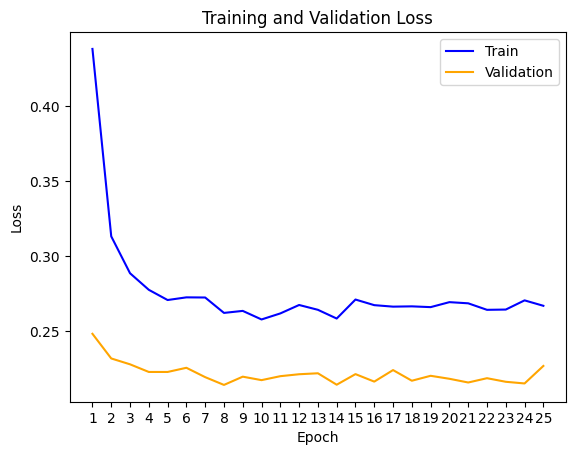

In [71]:
visualize_loss_statistics (n_epoch, train_loss_list, valid_loss_list)

In [73]:
# Save the model
torch.save(vitb16_with_pretrained_weights_and_higher_epoch.state_dict(),'vitb16_with_pretrained_weights_and_higher_epoch.pt')
# https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [74]:
class_correct,class_total,accuracy = ViT_testing (vitb16_with_pretrained_weights_and_higher_epoch)

Test Loss: 0.236720
Accuracy : 91.023936


Time Taken for inference of 3000 rows = 5198513.359732529 - 5198532.387719126 = 19.027988279238343 seconds 


In [75]:
display_accuracy_per_class (class_correct, class_total, accuracy)

Test Accuracy of Classes
buildings	: 92% 	 (406/437)
forest	: 98% 	 (468/474)
glacier	: 71% 	 (396/553)
mountain	: 93% 	 (492/525)
sea	: 98% 	 (502/510)
street	: 93% 	 (467/501)

Test Accuracy of Dataset: 	 91% 	 (2731/3000)


### ViT B32 with pretrained weights & higher epoch

In [ ]:
# hyper parameter
learning_rate = 0.001
drop_out_rate = 0.1
weight_decay  = 1e-2

# number of epoch
n_epoch = 25

In [ ]:
# define model
vitb32_with_pretrained_weights_and_higher_epoch = models.vit_b_32(weights=models.ViT_B_32_Weights.DEFAULT,dropout=drop_out_rate)

In [ ]:
criterion, optimizer = ViT_init (vitb32_with_pretrained_weights_and_higher_epoch, learning_rate, weight_decay)

In [ ]:
train_loss_list, valid_loss_list = ViT_training (vitb32_with_pretrained_weights_and_higher_epoch, criterion, optimizer, n_epoch)

In [ ]:
visualize_loss_statistics (n_epoch, train_loss_list, valid_loss_list)

In [ ]:
# Save the model
torch.save(vision_transformer_no_weights.state_dict(),'vitb32_with_pretrained_weights_and_higher_epoch.pt')
# https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [ ]:
class_correct,class_total,accuracy = ViT_testing (vitb32_with_pretrained_weights_and_higher_epoch)

In [ ]:
display_accuracy_per_class (class_correct, class_total, accuracy)

## Transformer Model without pretrained weights

### ViT-B/16 without pretrained Weights

In [60]:
# hyper parameter
learning_rate = 0.005
drop_out_rate = 0.1
weight_decay  = 1e-2

# number of epoch
n_epoch = 10

In [61]:
# define model
vitb16_without_pretrained_weights = models.vit_b_16(dropout=drop_out_rate)
vitb16_without_pretrained_weights

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.1, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.1, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.1, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.1, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [64]:
criterion, optimizer = ViT_init (vitb16_without_pretrained_weights, learning_rate, weight_decay)

In [65]:
train_loss_list, valid_loss_list = ViT_training (vitb16_without_pretrained_weights, criterion, optimizer, n_epoch)

Start Training
Batch 1 of 329
Batch 51 of 329
Batch 101 of 329
Batch 151 of 329
Batch 201 of 329
Batch 251 of 329
Batch 301 of 329
Validating model
Epoch: 1 	 Training Loss: 1.527019 	 Validation Loss: 1.430602
Batch 1 of 329
Batch 51 of 329
Batch 101 of 329
Batch 151 of 329
Batch 201 of 329
Batch 251 of 329
Batch 301 of 329
Validating model
Epoch: 2 	 Training Loss: 1.481378 	 Validation Loss: 1.484796
Batch 1 of 329
Batch 51 of 329
Batch 101 of 329
Batch 151 of 329
Batch 201 of 329
Batch 251 of 329
Batch 301 of 329
Validating model
Epoch: 3 	 Training Loss: 1.499328 	 Validation Loss: 1.570316
Batch 1 of 329
Batch 51 of 329
Batch 101 of 329
Batch 151 of 329
Batch 201 of 329
Batch 251 of 329
Batch 301 of 329
Validating model
Epoch: 4 	 Training Loss: 1.490154 	 Validation Loss: 1.524293
Batch 1 of 329
Batch 51 of 329
Batch 101 of 329
Batch 151 of 329
Batch 201 of 329
Batch 251 of 329
Batch 301 of 329
Validating model
Epoch: 5 	 Training Loss: 1.488909 	 Validation Loss: 1.452519
Batch

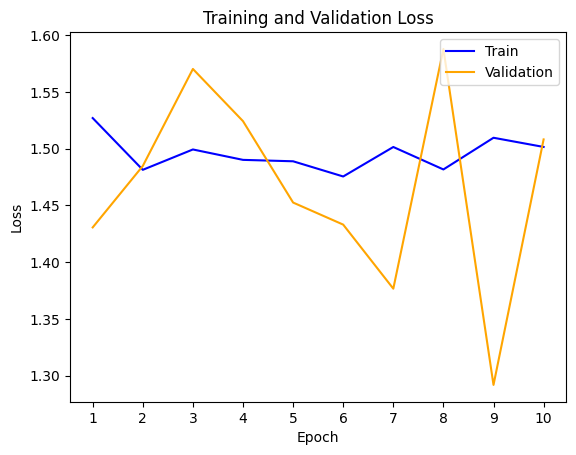

In [66]:
visualize_loss_statistics (n_epoch, train_loss_list, valid_loss_list)

In [70]:
# Save the model
torch.save(vision_transformer_no_weights.state_dict(),'vitb16_without_pretrained_weights.pt')
# https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [68]:
class_correct,class_total,accuracy = ViT_testing (vitb16_without_pretrained_weights)

Test Loss: 1.525493
Accuracy : 48.781028


Time Taken for inference of 3000 rows = 5219686.616786746 - 5219705.378135216 = 18.76135020982474 seconds 


In [45]:
display_accuracy_per_class (class_correct, class_total, accuracy)

Test Accuracy of Classes

buildings	: 29% 	 (131/437)
forest	: 83% 	 (394/474)
glacier	: 66% 	 (366/553)
mountain	: 76% 	 (400/525)
sea	: 35% 	 (180/510)
street	: 72% 	 (365/501)

Test Accuracy of Dataset: 	 61% 	 (1836/3000)


### ViT-B/16 without pretrained Weights and higher epoch

In [69]:
# hyper parameter
learning_rate = 0.005
drop_out_rate = 0.1
weight_decay  = 1e-2

# number of epoch
n_epoch = 25

In [70]:
# define model
vitb16_without_pretrained_weights_and_higher_epoch = models.vit_b_16(dropout=drop_out_rate)
vitb16_without_pretrained_weights_and_higher_epoch

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.1, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.1, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.1, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.1, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [71]:
criterion, optimizer = ViT_init (vitb16_without_pretrained_weights_and_higher_epoch, learning_rate, weight_decay)

In [72]:
train_loss_list, valid_loss_list = ViT_training (vitb16_without_pretrained_weights_and_higher_epoch, criterion, optimizer, n_epoch)

Start Training
Batch 1 of 329
Batch 51 of 329
Batch 101 of 329
Batch 151 of 329
Batch 201 of 329
Batch 251 of 329
Batch 301 of 329
Validating model
Epoch: 1 	 Training Loss: 1.521737 	 Validation Loss: 1.380234
Batch 1 of 329
Batch 51 of 329
Batch 101 of 329
Batch 151 of 329
Batch 201 of 329
Batch 251 of 329
Batch 301 of 329
Validating model
Epoch: 2 	 Training Loss: 1.516096 	 Validation Loss: 1.568610
Batch 1 of 329
Batch 51 of 329
Batch 101 of 329
Batch 151 of 329
Batch 201 of 329
Batch 251 of 329
Batch 301 of 329
Validating model
Epoch: 3 	 Training Loss: 1.472183 	 Validation Loss: 1.249196
Batch 1 of 329
Batch 51 of 329
Batch 101 of 329
Batch 151 of 329
Batch 201 of 329
Batch 251 of 329
Batch 301 of 329
Validating model
Epoch: 4 	 Training Loss: 1.463803 	 Validation Loss: 1.454980
Batch 1 of 329
Batch 51 of 329
Batch 101 of 329
Batch 151 of 329
Batch 201 of 329
Batch 251 of 329
Batch 301 of 329
Validating model
Epoch: 5 	 Training Loss: 1.472654 	 Validation Loss: 1.301944
Batch

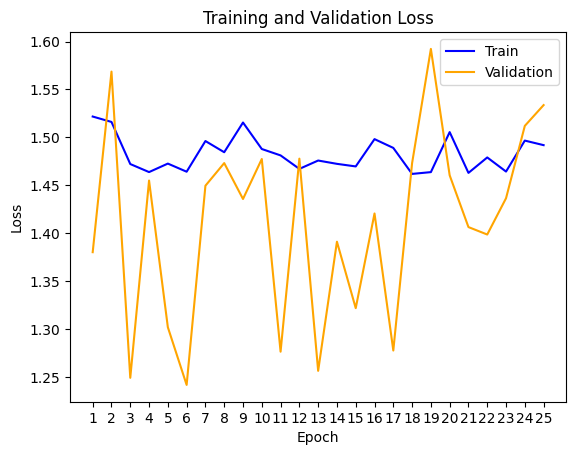

In [73]:
visualize_loss_statistics (n_epoch, train_loss_list, valid_loss_list)

In [ ]:
# Save the model
torch.save(vitb16_without_pretrained_weights_and_higher_epoch.state_dict(),'vitb16_without_pretrained_weights_and_higher_epoch.pt')
# https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [74]:
class_correct,class_total,accuracy = ViT_testing (vitb16_without_pretrained_weights_and_higher_epoch)

Test Loss: 1.519237
Accuracy : 48.049645


Time Taken for inference of 3000 rows = 5222601.030500537 - 5222621.947495522 = 20.916996655985713 seconds 


In [75]:
display_accuracy_per_class (class_correct, class_total, accuracy)

Test Accuracy of Classes
buildings	: 8% 	 (36/437)
forest	: 76% 	 (363/474)
glacier	: 90% 	 (501/553)
mountain	: 40% 	 (210/525)
sea	: 13% 	 (69/510)
street	: 52% 	 (262/501)

Test Accuracy of Dataset: 	 48% 	 (1441/3000)


### ViT-B/32 without pretrained Weights

In [76]:
# hyper parameter
learning_rate = 0.005
drop_out_rate = 0.1
weight_decay  = 1e-2

# number of epoch
n_epoch = 10

In [77]:
# define model
vitb32_without_pretrained_weights = models.vit_b_32(dropout=drop_out_rate)

In [78]:
criterion, optimizer = ViT_init (vitb32_without_pretrained_weights, learning_rate, weight_decay)

In [79]:
train_loss_list, valid_loss_list = ViT_training (vitb32_without_pretrained_weights, criterion, optimizer, n_epoch)

Start Training
Batch 1 of 329
Batch 51 of 329
Batch 101 of 329
Batch 151 of 329
Batch 201 of 329
Batch 251 of 329
Batch 301 of 329
Validating model
Epoch: 1 	 Training Loss: 1.545568 	 Validation Loss: 1.331088
Batch 1 of 329
Batch 51 of 329
Batch 101 of 329
Batch 151 of 329
Batch 201 of 329
Batch 251 of 329
Batch 301 of 329
Validating model
Epoch: 2 	 Training Loss: 1.525376 	 Validation Loss: 1.321400
Batch 1 of 329
Batch 51 of 329
Batch 101 of 329
Batch 151 of 329
Batch 201 of 329
Batch 251 of 329
Batch 301 of 329
Validating model
Epoch: 3 	 Training Loss: 1.498498 	 Validation Loss: 1.368891
Batch 1 of 329
Batch 51 of 329
Batch 101 of 329
Batch 151 of 329
Batch 201 of 329
Batch 251 of 329
Batch 301 of 329
Validating model
Epoch: 4 	 Training Loss: 1.497432 	 Validation Loss: 1.230133
Batch 1 of 329
Batch 51 of 329
Batch 101 of 329
Batch 151 of 329
Batch 201 of 329
Batch 251 of 329
Batch 301 of 329
Validating model
Epoch: 5 	 Training Loss: 1.491441 	 Validation Loss: 1.398800
Batch

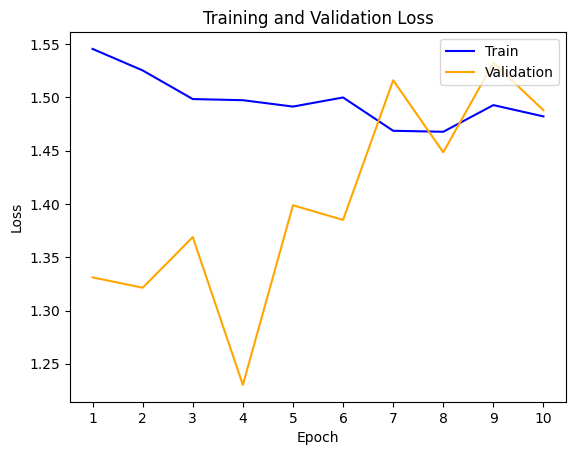

In [80]:
visualize_loss_statistics (n_epoch, train_loss_list, valid_loss_list)

In [ ]:
# Save the model
torch.save(vitb32_without_pretrained_weights.state_dict(),'vitb32_without_pretrained_weights.pt')
# https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [81]:
class_correct,class_total,accuracy = ViT_testing (vitb32_without_pretrained_weights)

Test Loss: 1.519157
Accuracy : 50.842199


Time Taken for inference of 3000 rows = 5223640.737146051 - 5223652.236382197 = 11.499237952753901 seconds 


In [82]:
display_accuracy_per_class (class_correct, class_total, accuracy)

Test Accuracy of Classes
buildings	: 2% 	 (10/437)
forest	: 85% 	 (404/474)
glacier	: 77% 	 (430/553)
mountain	: 60% 	 (315/525)
sea	: 12% 	 (64/510)
street	: 60% 	 (301/501)

Test Accuracy of Dataset: 	 50% 	 (1524/3000)


### ViT-B/32 without pretrained Weights and higher epoch

In [84]:
# hyper parameter
learning_rate = 0.005
drop_out_rate = 0.1
weight_decay  = 1e-2

# number of epoch
n_epoch = 25

In [85]:
# define model
vitb32_without_pretrained_weights_and_higher_epoch = models.vit_b_32(dropout=drop_out_rate)

In [86]:
criterion, optimizer = ViT_init (vitb32_without_pretrained_weights_and_higher_epoch, learning_rate, weight_decay)

In [ ]:
train_loss_list, valid_loss_list = ViT_training (vitb32_without_pretrained_weights_and_higher_epoch, criterion, optimizer, n_epoch)

In [ ]:
# # Save the model
# torch.save(vitb32_without_pretrained_weights_and_higher_epoch.state_dict(),'vitb32_without_pretrained_weights_and_higher_epoch.pt')
# # https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [ ]:
class_correct,class_total,accuracy = ViT_testing (vitb32_without_pretrained_weights_and_higher_epoch)

In [ ]:
display_accuracy_per_class (class_correct, class_total, accuracy)